In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
FILE   = "HMEQ_Loss.csv"

df = pd.read_csv( FILE, encoding="ISO-8859-1" )

In [4]:
TARGET_FLAG = 'TARGET_BAD_FLAG'
TARGET_LOSS = 'TARGET_LOSS_AMT'

In [5]:
df1 = df.copy()
df1 = df1.drop( [TARGET_FLAG], axis=1 ) #drop target variable
df1 = df1.drop( [TARGET_LOSS], axis=1 ) 
varNames = df1.columns

print( df1.head() )

   LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ       CLAGE  \
0  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   94.366667   
1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0  121.833333   
2  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0  149.466667   
3  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN         NaN   
4  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   93.333333   

   NINQ  CLNO  DEBTINC  
0   1.0   9.0      NaN  
1   0.0  14.0      NaN  
2   1.0  10.0      NaN  
3   NaN   NaN      NaN  
4   0.0  14.0      NaN  


In [6]:
dt = df1.dtypes

#create a new list of categorical and numerical variables
objList = []
numList = []
for i in dt.index :
    if dt[i] in (["object"]) : objList.append( i )
    if dt[i] in (["float64","int64"]) : numList.append( i )


print(" OBJECTS ")
print(" ------- ")
for i in objList :
    print( i )
print(" ------- \n\n")


print(" NUMBER ")
print(" ------- ")
for i in numList :
    print( i )
print(" ------- ")

 OBJECTS 
 ------- 
REASON
JOB
 ------- 


 NUMBER 
 ------- 
LOAN
MORTDUE
VALUE
YOJ
DEROG
DELINQ
CLAGE
NINQ
CLNO
DEBTINC
 ------- 


In [7]:
#drop object variables 
for i in objList:
    df1 = df1.drop( [i], axis=1 )

varNames = df1.columns
print(varNames)

Index(['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ',
       'CLNO', 'DEBTINC'],
      dtype='object')


In [8]:
impList = []
mList = []

#fill missing numeric values with the median
for i in numList :
    if df1[i].isna().sum() == 0 : continue 
    FLAG = "M_" + i 
    IMP = "IMP_" + i
    df1[ FLAG ] = df1[i].isna() + 0 
    df1[ IMP ] = df1[ i ]
    impList.append(IMP) #use list for numerical columns for removing outliers
    mList.append(FLAG) #use list for appending flag missing value variables later if needed
    df1.loc[ df1[IMP].isna(), IMP ] = df1[i].median()
    df1 = df1.drop( i, axis=1 )

print(df1.head().T)

                        0             1             2             3  \
LOAN          1100.000000   1300.000000   1500.000000   1500.000000   
M_MORTDUE        0.000000      0.000000      0.000000      1.000000   
IMP_MORTDUE  25860.000000  70053.000000  13500.000000  65019.000000   
M_VALUE          0.000000      0.000000      0.000000      1.000000   
IMP_VALUE    39025.000000  68400.000000  16700.000000  89235.500000   
M_YOJ            0.000000      0.000000      0.000000      1.000000   
IMP_YOJ         10.500000      7.000000      4.000000      7.000000   
M_DEROG          0.000000      0.000000      0.000000      1.000000   
IMP_DEROG        0.000000      0.000000      0.000000      0.000000   
M_DELINQ         0.000000      0.000000      0.000000      1.000000   
IMP_DELINQ       0.000000      2.000000      0.000000      0.000000   
M_CLAGE          0.000000      0.000000      0.000000      1.000000   
IMP_CLAGE       94.366667    121.833333    149.466667    173.466667   
M_NINQ

In [9]:
truncList = []

for i in impList :
    theMean = df1[i].mean()
    theSD = df1[i].std()
    theMax = df1[i].max()
    theCutoff = round( theMean + 3*theSD )
    if theMax < theCutoff : continue
    FLAG = "O_" + i
    TRUNC = "TRUNC_" + i
    df1[ FLAG ] = ( df1[i] > theCutoff )+ 0
    df1[ TRUNC ] = df1[ i ]
    truncList.append(TRUNC) #use list for numerical columns for data transformation
    df1.loc[ df1[TRUNC] > theCutoff, TRUNC ] = theCutoff
    df1 = df1.drop( i, axis=1 )

In [10]:
X = df1.copy() 
X = X[truncList]
varNames = X.columns 

print( X.head().T )
print( "\n\n")
print( X.describe() )

                              0             1             2             3  \
TRUNC_IMP_MORTDUE  25860.000000  70053.000000  13500.000000  65019.000000   
TRUNC_IMP_VALUE    39025.000000  68400.000000  16700.000000  89235.500000   
TRUNC_IMP_YOJ         10.500000      7.000000      4.000000      7.000000   
TRUNC_IMP_DEROG        0.000000      0.000000      0.000000      0.000000   
TRUNC_IMP_DELINQ       0.000000      2.000000      0.000000      0.000000   
TRUNC_IMP_CLAGE       94.366667    121.833333    149.466667    173.466667   
TRUNC_IMP_NINQ         1.000000      0.000000      1.000000      1.000000   
TRUNC_IMP_CLNO         9.000000     14.000000     10.000000     20.000000   
TRUNC_IMP_DEBTINC     34.818262     34.818262     34.818262     34.818262   

                               4  
TRUNC_IMP_MORTDUE   97800.000000  
TRUNC_IMP_VALUE    112000.000000  
TRUNC_IMP_YOJ           3.000000  
TRUNC_IMP_DEROG         0.000000  
TRUNC_IMP_DELINQ        0.000000  
TRUNC_IMP_CLAGE    

In [11]:
#standardize the data
theScaler = StandardScaler()
theScaler.fit( X )

Y_STD = theScaler.transform( X )
Y_STD = pd.DataFrame( Y_STD )
print( Y_STD.head() )

          0         1         2         3         4         5         6  \
0 -1.187821 -1.218785  0.243923 -0.329584 -0.418963 -1.067294 -0.081701   
1 -0.055078 -0.636046 -0.241631 -0.329584  1.837718 -0.718939 -0.791521   
2 -1.504630 -1.661666 -0.657820 -0.329584 -0.418963 -0.368469 -0.081701   
3 -0.184108 -0.222713 -0.241631 -0.329584 -0.418963 -0.064081 -0.081701   
4  0.656126  0.228887 -0.796550 -0.329584 -0.418963 -1.080400 -0.791521   

          7         8  
0 -1.247113  0.141543  
1 -0.736029  0.141543  
2 -1.144896  0.141543  
3 -0.122729  0.141543  
4 -0.736029  0.141543  


In [12]:
varNames_std = []
for i in varNames :
    newName = "std_" + i
    varNames_std.append( newName )

Y_STD.columns = varNames_std
print( Y_STD.head() )
print( "\n\n")
print( Y_STD.describe() )

   std_TRUNC_IMP_MORTDUE  std_TRUNC_IMP_VALUE  std_TRUNC_IMP_YOJ  \
0              -1.187821            -1.218785           0.243923   
1              -0.055078            -0.636046          -0.241631   
2              -1.504630            -1.661666          -0.657820   
3              -0.184108            -0.222713          -0.241631   
4               0.656126             0.228887          -0.796550   

   std_TRUNC_IMP_DEROG  std_TRUNC_IMP_DELINQ  std_TRUNC_IMP_CLAGE  \
0            -0.329584             -0.418963            -1.067294   
1            -0.329584              1.837718            -0.718939   
2            -0.329584             -0.418963            -0.368469   
3            -0.329584             -0.418963            -0.064081   
4            -0.329584             -0.418963            -1.080400   

   std_TRUNC_IMP_NINQ  std_TRUNC_IMP_CLNO  std_TRUNC_IMP_DEBTINC  
0           -0.081701           -1.247113               0.141543  
1           -0.791521           -0.736029 

In [13]:
MAX_N = Y_STD.shape[1] #tell us how many variables

#create PCs
pca = PCA(n_components=MAX_N) #create the same number of original variables
pca.fit( Y_STD )

PCA(n_components=9)

In [14]:
#look at eigen values - how much information in each PC
ev = pca.explained_variance_
print("Eigen Values")
print(ev)

Eigen Values
[2.16999301 1.43739568 1.24532789 0.98605536 0.83760722 0.81452937
 0.74040446 0.61242042 0.15777691]


In [15]:
varPCT = []
totPCT = []
total = 0
for i in ev:
    total = total + i
    VAR = int( i / len(ev) * 100)
    PCT = int( total / len(ev) * 100)
    varPCT.append(VAR)
    totPCT.append( PCT )
    print( round(i,2), "variation=", VAR,"%"," total=", PCT,"%")

2.17 variation= 24 %  total= 24 %
1.44 variation= 15 %  total= 40 %
1.25 variation= 13 %  total= 53 %
0.99 variation= 10 %  total= 64 %
0.84 variation= 9 %  total= 74 %
0.81 variation= 9 %  total= 83 %
0.74 variation= 8 %  total= 91 %
0.61 variation= 6 %  total= 98 %
0.16 variation= 1 %  total= 100 %


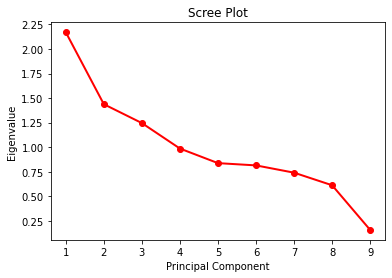

In [16]:
#create Scree Plot
PC_NUM = np.arange( MAX_N ) + 1 
plt.plot( PC_NUM , ev, 'ro-', linewidth=2) #plot 1 to 9 on x-axis, ev on y-axis
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

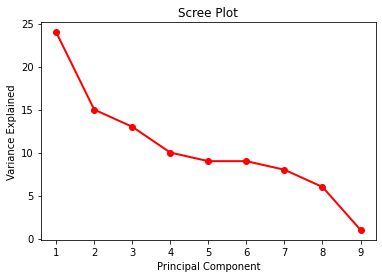

In [17]:
PC_NUM = np.arange( MAX_N ) + 1
plt.plot( PC_NUM , varPCT, 'ro-', linewidth=2) #use the percentage of the total information instead
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

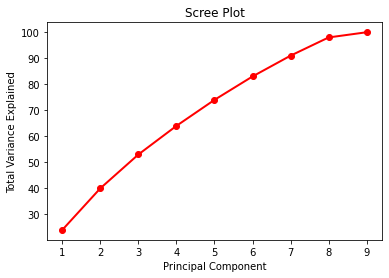

In [18]:
PC_NUM = np.arange( MAX_N ) + 1
plt.plot( PC_NUM , totPCT, 'ro-', linewidth=2) #use running total percentage of information
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Total Variance Explained')
plt.show()

In [19]:
dfc = pd.DataFrame( pca.components_ ) #get pc and weights
dfc.columns = list( X.columns)
dfc = dfc.iloc[0:5,:]

dfc = dfc.set_axis(['PC1','PC2','PC3','PC4','PC5'], axis=0)

print( dfc.T )

                        PC1       PC2       PC3       PC4       PC5
TRUNC_IMP_MORTDUE  0.599264 -0.048214 -0.233698  0.196359  0.104302
TRUNC_IMP_VALUE    0.595345 -0.107601 -0.178048  0.196608  0.156791
TRUNC_IMP_YOJ      0.012565 -0.266796  0.552498 -0.271267  0.460117
TRUNC_IMP_DEROG   -0.028194  0.520258  0.200053  0.425923  0.236893
TRUNC_IMP_DELINQ   0.062710  0.378211  0.489581  0.309360 -0.372277
TRUNC_IMP_CLAGE    0.245347 -0.316222  0.480113 -0.114906 -0.055883
TRUNC_IMP_NINQ     0.061608  0.519724 -0.062358 -0.357743  0.592034
TRUNC_IMP_CLNO     0.420290  0.159582  0.288644 -0.139703 -0.164546
TRUNC_IMP_DEBTINC  0.202304  0.325006 -0.104911 -0.641396 -0.421212


In [20]:
X_PCA = pca.transform( Y_STD )
X_PCA = pd.DataFrame( X_PCA )
X_PCA = X_PCA.iloc[:,0:5] #would like to get all the rows and PC1,PC2,PC3,PC4,PC5 to get 74% of the info

#add column names
colNames = X_PCA.columns
pcaNames = []
for i in colNames :
    index = int(i) + 1
    theName = "PC_" + str(index)
    pcaNames.append( theName )

X_PCA.columns = pcaNames

print( X_PCA.head() )

       PC_1      PC_2      PC_3      PC_4      PC_5
0 -2.213738 -0.064566 -0.523838 -0.573712  0.032002
1 -0.796038  0.403654  0.303282  0.735630 -1.345805
2 -2.464173  0.034273 -0.504138 -0.572960 -0.541261
3 -0.306641 -0.228400 -0.397817 -0.321428 -0.171620
4 -0.092079 -0.314853 -1.601887  0.539274 -0.531030


In [21]:
#add target variables back in
X_PCA[ "TARGET_BAD_FLAG" ] = df['TARGET_BAD_FLAG']
X_PCA[ "TARGET_LOSS_AMT" ] = df['TARGET_LOSS_AMT']

#add categorical variables back in
for i in objList:
    X_PCA[i] = df[i]
    
print( X_PCA.head() )

       PC_1      PC_2      PC_3      PC_4      PC_5  TARGET_BAD_FLAG  \
0 -2.213738 -0.064566 -0.523838 -0.573712  0.032002                1   
1 -0.796038  0.403654  0.303282  0.735630 -1.345805                1   
2 -2.464173  0.034273 -0.504138 -0.572960 -0.541261                1   
3 -0.306641 -0.228400 -0.397817 -0.321428 -0.171620                1   
4 -0.092079 -0.314853 -1.601887  0.539274 -0.531030                0   

   TARGET_LOSS_AMT   REASON     JOB  
0            641.0  HomeImp   Other  
1           1109.0  HomeImp   Other  
2            767.0  HomeImp   Other  
3           1425.0      NaN     NaN  
4              NaN  HomeImp  Office  


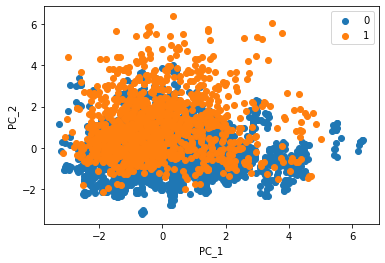

In [22]:
for Name, Group in X_PCA.groupby(TARGET_FLAG):
    plt.scatter(Group.PC_1, Group.PC_2, label=Name)
plt.xlabel("PC_1")
plt.ylabel("PC_2")
plt.legend()
plt.show()